# GAN（Generative Adversarial Nets）

#Generative

[pdf链接](https://arxiv.org/abs/1406.2661)

[源码链接-pytorch](https://blog.csdn.net/qinglingLS/article/details/91480550) , [源码链接-Tensorflow](https://blog.csdn.net/qinglingLS/article/details/91480550)

解读

GAN 由两个独立的网络-生成网络 Generator 和判别网络 Discriminator 组成.
 1. Generator 生成的样本被认为是 fake 样本；Discriminator 是一个二值分类器，用于判断输入样本是real还是fake.
 2. 目标：Generator 是尽量让生成的样本骗过 Discriminator;Discriminator 的目标是尽可能的判断准确.
 3. 当训练数据集中的样本作为 Discriminator 的输入时，Discriminator 输出其为 real；当 Generator 生成的样本作为 Discriminator 的输入时，Discriminator 输出其为 fake.
 4. GAN 的目标函数为 min-max 优化表达式，其期望 Generator 最小化目标函数；Discriminator 最大化相同的目标函数.
 
 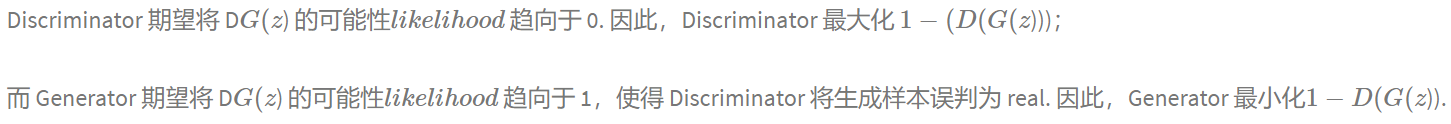

## 摘要与网络结构框图

We propose a new framework for estimating generative models via an adversar ial process, in which we simultaneously train two models: a generative model G that captures the data distribution, and a discriminative model D that estimates the probability that a sample came from the training data rather than G. The train ing procedure for G is to maximize the probability of D making a mistake. This framework corresponds to a minimax two-player game. In the space of arbitrary functions G and D, a unique solution exists, with G recovering the training data distribution and D equal to 1/2everywhere. In the case where G and D are defined by multilayer perceptrons, the entire system can be trained with backpropagation. There is no need for any Markov chains or unrolled approximate inference net works during either training or generation of samples. Experiments demonstrate the potential of the framework through qualitative and quantitative evaluation of the generated samples.

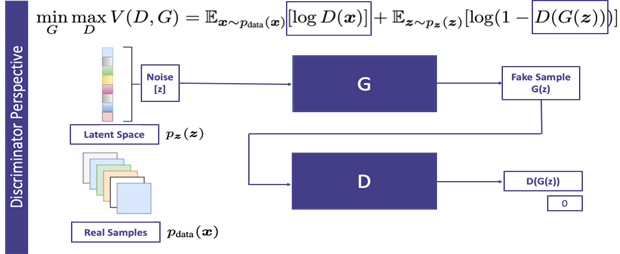

## 主要创新点

 1.GAN不需要显示的密度函数定义，利用游戏理论方法，2个玩家博弈来学习训练数据的分布。
 
 2.相比较传统的模型，他存在两个不同的网络，而不是单一的网络，并且训练方式采用的是对抗训练方式。GAN中G的梯度更新信息来自判别器D，而不是来自数据样本

## 步骤和过程

1. 一下是GAN的算法流程，使用目标函数在两个网络中进行参数的梯度改变：

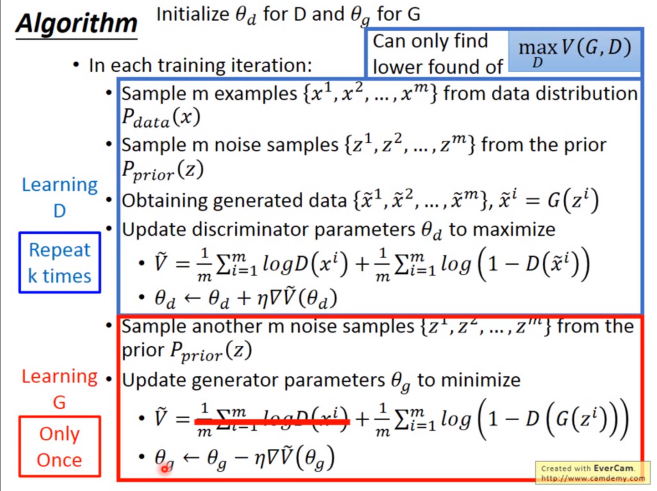

2. 流程理解，如：

   （1）真实数据x的分布为1维的高斯分布p(data),生成器G为一个多层感知机，他从随机噪声中随机挑出数据z输入，输出为G(z)，G的分布为p(g)；判别器D也是一个多层感知机。
   
   （2）G的目的让p(g)和p(data)最够像，则D就无法将来自G数据鉴别出来，即D(G(z))足够小。而D目的要正确鉴别处G(z)，即让D(x)足够大，D(G(z))足够小。
   
   （3）综上让(D(x)+(1-D(G(z))))足够大    
   

3. 训练GAN的一些技巧：
    (1)输入规范化到（-1，1）之间，最后一层的激活函数使用tanh（BEGAN除外）
    
    (2)使用wassertein GAN的损失函数
    
    (3)如果有标签数据的话，尽量使用标签，也有人提出使用反转标签效果很好，另外使用标签平滑，单边标签平滑或者双边标签平滑
    
    (4)使用mini-batch norm， 如果不用batch norm 可以使用instance norm 或者weight norm
    
    (5)避免使用RELU和pooling层，减少稀疏梯度的可能性，可以使用leakrelu激活函数
    
    (6)化器尽量选择ADAM，学习率不要设置太大，初始1e-4可以参考，另外可以随着训练进行不断缩小学习率
    
    (7)给D的网络层增加高斯噪声，相当于是一种正则


## 结果分析

## 启示

GAN是一种生成式模型，相比较其他生成模型（玻尔兹曼机和GSNs）只用到了反向传播,而不需要复杂的马尔科夫链

相比其他所有模型, GAN可以产生更加清晰，真实的样本

GAN应用到一些场景上，比如图片风格迁移，超分辨率，图像补全，去噪，避免了损失函数设计的困难，不管三七二十一，只要有一个的基准，直接上判别器，剩下的就交给对抗训练了。

但GAN不适合处理离散形式的数据，比如文本。而且早期的GAN存在训练不稳定、梯度消失、模式崩溃的问题